## Image Quality Dataset

Notebook to explore the datasets of the image quality user study.

The full dataset is composed of 3 files: ads metadata, user scores and user justifications (for a subset of 14 ads).

### Ads Metadata

**Fields:** id, title, category, image in bytes and image type as avg/good/bad. 
The image type is extracted using Claude Sonnet 3.5 with the goal of having images of diverse quality. A few additional images that belonged to screenshots or catalogs were also included.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ads_df = pd.read_parquet("../datasets/ads.parquet")

print("Total ads: ", len(ads_df))
ads_df.head()

Total ads:  634


,ad_id,img_type,title,category,image
0,2764401045,avg,Grand canapé avec banc,Canapé,b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x0...
1,2781457697,bad,Urgent canapé d’angle cocktail scandinave,Canapé,b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x0...
2,2776861197,good,Lot de 2 canapés / 1 place Gris Foncé,Canapé,b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x0...
3,2785889684,avg,Vends canapé 6-8 personnes,Canapé,b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x0...
4,2785648284,good,"Vente canapé en très bon état, beige, pieds dorés",Canapé,b'\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x03\x0...


In [3]:
ads_df.groupby(["category", "img_type"])["ad_id"].agg("count")

category  img_type  
Canapé    avg           68
          bad           68
          catalog        7
          good          68
          screenshot     7
Sac       avg           68
          bad           68
          catalog        4
          good          68
          screenshot     1
Vetement  avg           68
          bad           68
          catalog        3
          good          68
Name: ad_id, dtype: int64

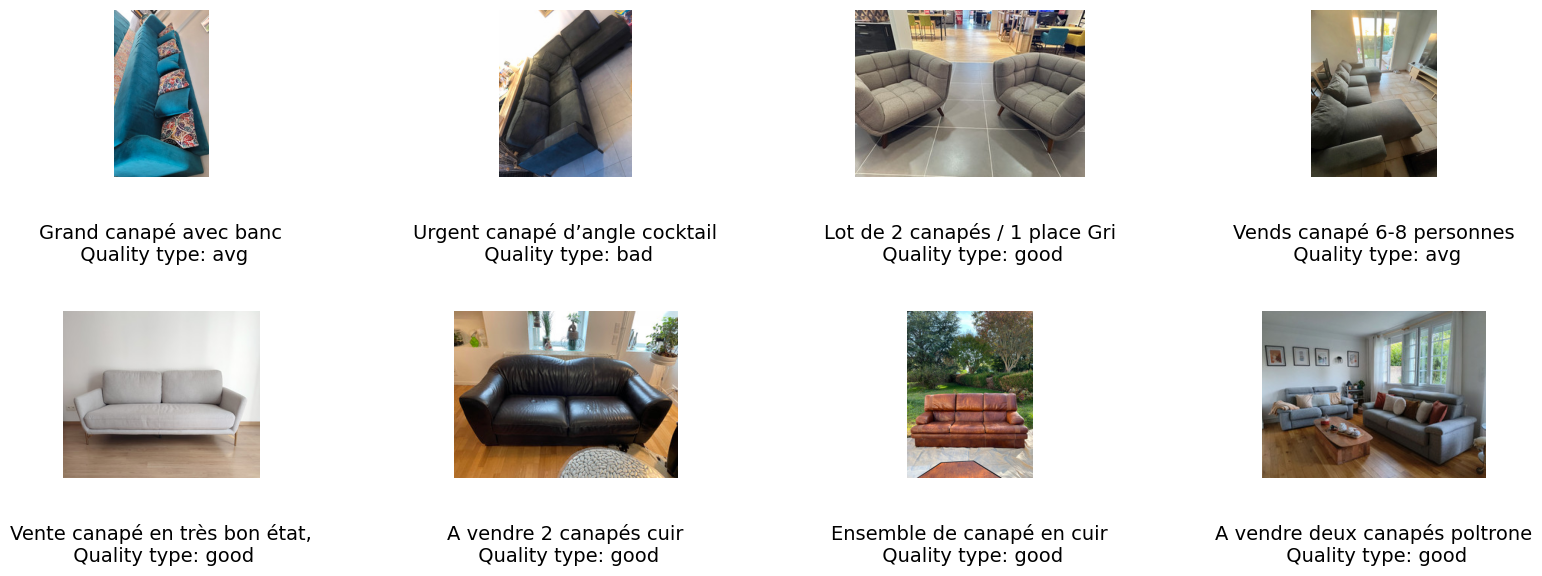

In [4]:
## plot some images
from PIL import Image
import io

def plot_image(ad_img, X, i, num_images = 8, columns = 4):
    plt.subplot(int(num_images / columns + 1), columns, i + 1)

    plt.imshow(ad_img)
    plt.subplots_adjust(hspace=0.8) 
    
    plt.axis('off')
    label = str(X.iloc[i].title[:30]) + "\n Quality type: " + X.iloc[i].img_type
    
    plt.text(0.5, -0.5, label, color='black', backgroundcolor='white', fontsize=14, transform=plt.gca().transAxes, ha='center')
    
def plot_images_sample(df, num_images=8):
    plt.figure(figsize=(20, 10))
    
    num_images = num_images if len(df) >= num_images else len(df)
    
    for i in range(num_images):
        ad_img_bytes = df.iloc[i].image
        ad_img = Image.open(io.BytesIO(ad_img_bytes))
        plot_image(ad_img, df, i, num_images)

plot_images_sample(ads_df[:8])

### User Scores

**Fields:** user_id, ad_id, user_score

In [5]:
user_scores_df = pd.read_parquet("../datasets/user_scores.parquet")

print("Total scores: ", len(user_scores_df))
user_scores_df.head()

Total scores:  5527


,user_id,user_score,ad_id
0,0,4,2764401045
1,1,4,2764401045
2,2,4,2764401045
3,3,1,2764401045
4,4,4,2765114732


In [6]:
adIds = user_scores_df['ad_id'].unique()
userIds = user_scores_df['user_id'].unique()
print("Unique ads: ", len(adIds))
print("Unique users: ", len(userIds))

Unique ads:  581
Unique users:  929


/var/folders/l8/8swt3lp93dz4m4cxxntwhh6m0000gn/T/ipykernel_44963/542781057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=user_scores_df, x="user_score", palette="pastel", stat='percent')


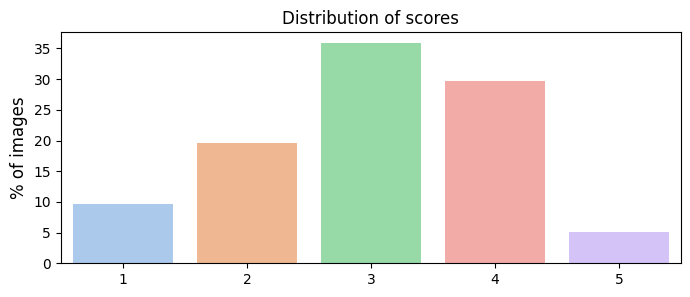

In [7]:
plt.figure(figsize=(8,3))
plot = sns.countplot(data=user_scores_df, x="user_score", palette="pastel", stat='percent')
plt.title(f"Distribution of scores")
plt.xlabel("")
plt.ylabel("% of images", fontsize=12)

plt.show()


In [8]:
# stats for the number of responses per ad image
pd.DataFrame(user_scores_df.groupby('ad_id')['user_id'].count()).describe()

,user_id
count,581.000000
mean,9.512909
std,3.806789
min,2.000000
25%,7.000000
50%,9.000000
75%,11.000000
max,34.000000


### User Justifications

Justifications for the scores on a subset of 14 ads from 114 users.

Original justifications are in French and have been translated to English using Google Translate.

**Fields:** user_id, ad_id, score, justification in French (`answer`) and justification in English (`answer_eng`).

In [9]:
user_justifs_df = pd.read_parquet("../datasets/user_justifications.parquet")

print("Total justifications: ", len(user_justifs_df))
user_justifs_df.head()

Total justifications:  121


,user_id,ad_id,user_score,answer,answer_eng
0,75,2771928944,3.0,Mauvais cadrage (on ne voit pas l’intégralité ...,Bad framing (we can't see the entire sofa) and...
1,76,2771928944,2.0,le canapé parait sale,the sofa looks dirty
2,77,2771928944,3.0,car on ne voit pas bien l état du coin,because we can't really see the state of the area
3,78,2771928944,2.0,je ne vois pas le canapé de face et il est fro...,I can't see the sofa from the front and it's w...
4,14,2771928944,3.0,on ne voit pas assez bien le canapé dans son e...,we can't see the sofa as a whole well enough


In [10]:
adIds = user_justifs_df['ad_id'].unique()
userIds = user_justifs_df['user_id'].unique()
print("Unique ads: ", len(adIds))
print("Unique users: ", len(userIds))

Unique ads:  14
Unique users:  114


In [11]:
pd.DataFrame(user_justifs_df.groupby('ad_id')['user_id'].count()).describe()

,user_id
count,14.000000
mean,8.642857
std,3.152707
min,3.000000
25%,7.000000
50%,8.500000
75%,10.000000
max,16.000000
